In [3]:


import pandas as pd
import censusdata


from tabulate import tabulate

In [4]:

df = censusdata.download('acs5', 
           2015,
           censusdata.censusgeo([('state', '06'), ('county', '*')]),
           ['B08301_001E', 'B08301_010E'])



column_names = ['total_transpo', 'total_public_transpo']
df.columns = column_names

df['percent_public_transpo'] = df.apply(
   lambda row: row['total_public_transpo']/row['total_transpo'], 
   axis = 1)

new_indices = []
county_names = []
for index in df.index.tolist():
        new_index = index.geo[0][1] + index.geo[1][1]
        new_indices.append(new_index)
        county_name = index.name.split(',')[0]
        county_names.append(county_name)
df.index = new_indices
df['county_name'] = county_names
print(tabulate(df, headers='keys', tablefmt='psql'))

+-------+-----------------+------------------------+--------------------------+------------------------+
|       |   total_transpo |   total_public_transpo |   percent_public_transpo | county_name            |
|-------+-----------------+------------------------+--------------------------+------------------------|
| 06001 |          719132 |                  98003 |               0.13628    | Alameda County         |
| 06003 |             395 |                      0 |               0          | Alpine County          |
| 06005 |           11880 |                     58 |               0.00488215 | Amador County          |
| 06007 |           86547 |                    990 |               0.0114389  | Butte County           |
| 06009 |           15643 |                     48 |               0.00306847 | Calaveras County       |
| 06011 |            8570 |                     28 |               0.00326721 | Colusa County          |
| 06013 |          495757 |                  49863 |   

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import operator

In [6]:
filename1 = '/Users/nishi/Downloads/cbg_patterns.csv'

In [7]:
#reading the data from the original dataset
data1 = pd.read_csv(filename1, dtype = {'census_block_group':str})

In [8]:
data1.head

<bound method NDFrame.head of        census_block_group  date_range_start  date_range_end  raw_visit_count  \
0            010059508001        1538352000      1541030400          75122.0   
1            010090506011        1538352000      1541030400          95649.0   
2            010479572002        1538352000      1541030400          14009.0   
3            010690404001        1538352000      1541030400         128169.0   
4            010730112101        1538352000      1541030400          51453.0   
5            010970063022        1538352000      1541030400         152557.0   
6            011030057022        1538352000      1541030400          66576.0   
7            011150403002        1538352000      1541030400          23534.0   
8            020200014005        1538352000      1541030400          20349.0   
9            040019443002        1538352000      1541030400           5102.0   
10           040130927111        1538352000      1541030400          41903.0   
11        

In [9]:
data1.shape

(220735, 13)

In [10]:
#the type of every column in the dataset
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220735 entries, 0 to 220734
Data columns (total 13 columns):
census_block_group          220734 non-null object
date_range_start            220735 non-null int64
date_range_end              220735 non-null int64
raw_visit_count             220629 non-null float64
raw_visitor_count           220629 non-null float64
visitor_home_cbgs           220735 non-null object
visitor_work_cbgs           220735 non-null object
distance_from_home          220518 non-null float64
related_same_day_brand      220735 non-null object
related_same_month_brand    220735 non-null object
top_brands                  220735 non-null object
popularity_by_hour          220735 non-null object
popularity_by_day           220735 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 21.9+ MB


In [11]:
# delete the columns that are not necessary

del data1['date_range_start']
del data1['date_range_end']

In [12]:
#check if columns are gone
data1.head()

,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
0,010059508001,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10..."
1,010090506011,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...","{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12..."
2,010479572002,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195..."
3,010690404001,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17..."
4,010730112101,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550..."


In [13]:
#check if there are any empty(nell) rows in the census block group column

data1[data1['census_block_group'].isna()]

,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
220734,NaN,NaN,NaN,{},{},NaN,[],[],[],[],{}


In [14]:
#remove the empty(null) rows

data1 = data1.dropna(subset=['census_block_group'])

In [15]:
data1.shape

(220734, 11)

In [16]:
data1.describe()

,raw_visit_count,raw_visitor_count,distance_from_home
count,2.206290e+05,2.206290e+05,2.205180e+05
mean,4.793066e+04,1.182032e+04,3.511280e+04
std,6.252655e+04,3.045832e+04,9.973193e+04
min,6.000000e+01,5.000000e+01,7.060000e+02
25%,1.704200e+04,3.430000e+03,8.584000e+03
50%,3.064000e+04,6.541000e+03,1.461400e+04
75%,5.667800e+04,1.309900e+04,3.139775e+04
max,7.179900e+06,6.113949e+06,6.297845e+06


In [17]:
filename2 = "/Users/nishi/Downloads/safegraph_open_census_data/metadata/cbg_geographic_data.csv"
data2 = pd.read_csv(filename2, dtype={'census_block_group':str})

In [18]:
data2.head


<bound method NDFrame.head of        census_block_group  amount_land  amount_water   latitude  longitude
0            010010201001    4254524.0         23431  32.465829 -86.489614
1            010010201002    5568295.0             0  32.485849 -86.489690
2            010010202001    2058380.0             0  32.480082 -86.474974
3            010010202002    1283506.0          5968  32.464435 -86.469766
4            010010203001    3866515.0          9054  32.480175 -86.460793
5            010010203002    1482758.0             0  32.464309 -86.458472
6            010010204001    2730062.0          1011  32.485161 -86.444772
7            010010204002    1782462.0         15233  32.470438 -86.435969
8            010010204003     750824.0             0  32.463222 -86.444280
9            010010204004    1119359.0             0  32.456070 -86.441762
10           010010205001    4317356.0             0  32.446072 -86.418657
11           010010205002    5196333.0         46159  32.472919 -86.42

In [19]:
data2.shape

(220333, 5)

In [20]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220333 entries, 0 to 220332
Data columns (total 5 columns):
census_block_group    220333 non-null object
amount_land           220333 non-null float64
amount_water          220333 non-null int64
latitude              220333 non-null float64
longitude             220333 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 8.4+ MB


In [21]:
del data2['amount_land']
del data2['amount_water']

In [22]:
data2.head()

,census_block_group,latitude,longitude
0,010010201001,32.465829,-86.489614
1,010010201002,32.485849,-86.489690
2,010010202001,32.480082,-86.474974
3,010010202002,32.464435,-86.469766
4,010010203001,32.480175,-86.460793


In [23]:
data2.shape

(220333, 3)

In [24]:
data2[data2['census_block_group'].isna()]

,census_block_group,latitude,longitude


In [25]:
data2.describe()

,latitude,longitude
count,220333.000000,220333.000000
mean,37.682385,-91.145732
std,5.518045,16.278313
min,17.901633,-175.860041
25%,33.986036,-97.595451
50%,38.920937,-86.723104
75%,41.480645,-79.396160
max,71.249841,178.338813


In [26]:
# data2 contains 220333 rows and data1 contains 220734
# this means that there is a difference of 401 rows
# this could be due to three reasons:
# 1.some rows are present in data1 and data2
# 2.some rows are present in data1 and not in data2
# 3.some rows are present in data2 and not in data1

In [27]:
#1. some rows are presesnt in data1 and data2:

s1 = data1.merge(data2)

In [28]:
s1.shape

(220331, 13)

In [29]:
common = data1.merge(data2,on=['census_block_group'])

In [30]:
common.shape

(220331, 13)

In [31]:
# this means that there are 220331 rows that are common between data1 and data2

In [32]:
#2. some rows are present in data 1 and not in data 2

s1 = set(data1['census_block_group'])
s2 = set(data2['census_block_group'])

In [33]:
s3 = s1.difference(s2)
len(s3)

403

In [34]:
#3. some rows are present in data 2 and not in data 1

s4 = s2.difference(s1)
len(s4)

2

In [35]:
#now, i choose the columns for the first analysis
common_key = common[['census_block_group']].copy()

In [36]:
#Check that first character is a number and 
#create a table counting the number of rows per first character

common_key['first'] = common_key['census_block_group'].str[:1]


In [37]:
common_key.groupby('first').count()

,census_block_group
first,
0,39626
1,36970
2,38090
3,44430
4,41493
5,17128
7,2594


In [38]:
# all cbgs start with a number in this range {0,1,2,3,4,5,7}, the majority starting with '3'
#Check that last character is a number and 
#create a table counting the number of rows per last character

In [39]:
common_key['last'] = common_key['census_block_group'].str[-1]

In [40]:
common_key.groupby('last')['last'].count()

last
0      598
1    73642
2    68035
3    45911
4    22073
5     7460
6     2082
7      452
8       67
9       11
Name: last, dtype: int64

In [41]:
# cbgs end with a number in this range {0:9}, the majority ending with '1'
#check length

In [42]:
common_key['slen'] = common_key['census_block_group'].str.len()

In [43]:
common_key.groupby('slen')['slen'].count()

slen
12    220331
Name: slen, dtype: int64

In [44]:
#check that the 'census_block_group is a unique identifier'
common_key['census_block_group'].is_unique

True

In [45]:
#select the columns : 
#‘visitor_home_cbgs’, ‘visitor_work_cbgs’, and ‘popularity_by_day’
    

In [46]:
common_dict = common[['visitor_home_cbgs', 'visitor_work_cbgs', 'popularity_by_day']].copy()

In [47]:
#add index
common_dict['index_col'] = common_dict.index

In [48]:
common_dict['index_col'].head()

0    0
1    1
2    2
3    3
4    4
Name: index_col, dtype: int64

In [49]:
common_dict_melt = pd.melt(common_dict,id_vars=['index_col'])

In [50]:
common_dict_melt.head()


,index_col,variable,value
0,0,visitor_home_cbgs,"{""010059501003"":127,""010059509001"":111,""010059..."
1,1,visitor_home_cbgs,"{""010730113021"":210,""010090506022"":205,""010090..."
2,2,visitor_home_cbgs,"{""010479567011"":67,""010479567021"":60}"
3,3,visitor_home_cbgs,"{""010690402013"":370,""010690402011"":322,""010690..."
4,4,visitor_home_cbgs,"{""010090507001"":183,""010730113021"":167,""010730..."


In [51]:
common_dict_melt['value'] = common_dict_melt['value'].map(lambda x: x.lstrip('{').rstrip('}'))

In [52]:
common_dict_melt.head()

,index_col,variable,value
0,0,visitor_home_cbgs,"""010059501003"":127,""010059509001"":111,""0100595..."
1,1,visitor_home_cbgs,"""010730113021"":210,""010090506022"":205,""0100905..."
2,2,visitor_home_cbgs,"""010479567011"":67,""010479567021"":60"
3,3,visitor_home_cbgs,"""010690402013"":370,""010690402011"":322,""0106904..."
4,4,visitor_home_cbgs,"""010090507001"":183,""010730113021"":167,""0107301..."


In [53]:
common_dict_melt.iloc[-5:]

,index_col,variable,value
660988,220326,popularity_by_day,
660989,220327,popularity_by_day,
660990,220328,popularity_by_day,
660991,220329,popularity_by_day,
660992,220330,popularity_by_day,


In [54]:
#split column

In [55]:
common_dict_melt_split = pd.concat([common_dict_melt, common_dict_melt['value'].str.split(',', expand=True)], axis=1)

In [56]:
common_dict_melt_split.head()

,index_col,variable,value,0,1,2,3,4,5,6,...,926,927,928,929,930,931,932,933,934,935
0,0,visitor_home_cbgs,"""010059501003"":127,""010059509001"":111,""0100595...","""010059501003"":127","""010059509001"":111","""010059509002"":106","""010059505001"":102","""010059506002"":92","""010059508002"":82","""010059505003"":64",...,None,None,None,None,None,None,None,None,None,None
1,1,visitor_home_cbgs,"""010730113021"":210,""010090506022"":205,""0100905...","""010730113021"":210","""010090506022"":205","""010090506024"":164","""010730115001"":145","""010730117041"":135","""010830212001"":130","""010730114004"":126",...,None,None,None,None,None,None,None,None,None,None
2,2,visitor_home_cbgs,"""010479567011"":67,""010479567021"":60","""010479567011"":67","""010479567021"":60",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,3,visitor_home_cbgs,"""010690402013"":370,""010690402011"":322,""0106904...","""010690402013"":370","""010690402011"":322","""010690402021"":275","""010690402022"":206","""010690409002"":201","""010690421002"":200","""010690401001"":177",...,None,None,None,None,None,None,None,None,None,None
4,4,visitor_home_cbgs,"""010090507001"":183,""010730113021"":167,""0107301...","""010090507001"":183","""010730113021"":167","""010730112071"":132","""010090507003"":129","""010730112061"":115","""010730112062"":110","""010730112051"":103",...,None,None,None,None,None,None,None,None,None,None


In [57]:
common_dict_melt_split_vis_home = common_dict_melt_split.loc[common_dict_melt_split['variable'] == 'visitor_home_cbgs']

In [58]:
common_dict_melt_split_vis_home.head()

,index_col,variable,value,0,1,2,3,4,5,6,...,926,927,928,929,930,931,932,933,934,935
0,0,visitor_home_cbgs,"""010059501003"":127,""010059509001"":111,""0100595...","""010059501003"":127","""010059509001"":111","""010059509002"":106","""010059505001"":102","""010059506002"":92","""010059508002"":82","""010059505003"":64",...,None,None,None,None,None,None,None,None,None,None
1,1,visitor_home_cbgs,"""010730113021"":210,""010090506022"":205,""0100905...","""010730113021"":210","""010090506022"":205","""010090506024"":164","""010730115001"":145","""010730117041"":135","""010830212001"":130","""010730114004"":126",...,None,None,None,None,None,None,None,None,None,None
2,2,visitor_home_cbgs,"""010479567011"":67,""010479567021"":60","""010479567011"":67","""010479567021"":60",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,3,visitor_home_cbgs,"""010690402013"":370,""010690402011"":322,""0106904...","""010690402013"":370","""010690402011"":322","""010690402021"":275","""010690402022"":206","""010690409002"":201","""010690421002"":200","""010690401001"":177",...,None,None,None,None,None,None,None,None,None,None
4,4,visitor_home_cbgs,"""010090507001"":183,""010730113021"":167,""0107301...","""010090507001"":183","""010730113021"":167","""010730112071"":132","""010090507003"":129","""010730112061"":115","""010730112062"":110","""010730112051"":103",...,None,None,None,None,None,None,None,None,None,None


In [59]:
common_dict_melt_split_vis_home_unpivot = pd.melt(common_dict_melt_split_vis_home, id_vars=['index_col','variable'])

In [60]:
common_dict_melt_split_vis_home_unpivot.head()

,index_col,variable,variable,value
0,0,value,value,"""010059501003"":127,""010059509001"":111,""0100595..."
1,1,value,value,"""010730113021"":210,""010090506022"":205,""0100905..."
2,2,value,value,"""010479567011"":67,""010479567021"":60"
3,3,value,value,"""010690402013"":370,""010690402011"":322,""0106904..."
4,4,value,value,"""010090507001"":183,""010730113021"":167,""0107301..."


In [61]:
# calculate position of ':' for each row

a = common_dict_melt_split_vis_home_unpivot['value'].str.find(':')

In [62]:
a.shape

(206450147,)

In [63]:
np.unique(a)

array([-1., 14., nan, ..., nan, nan, nan])

In [64]:
a.value_counts

<bound method IndexOpsMixin.value_counts of 0            14.0
1            14.0
2            14.0
3            14.0
4            14.0
5            14.0
6            14.0
7            14.0
8            14.0
9            -1.0
10           14.0
11           14.0
12           14.0
13           14.0
14           14.0
15           14.0
16           14.0
17           14.0
18           14.0
19           14.0
20           14.0
21           14.0
22           14.0
23           14.0
24           14.0
25           14.0
26           14.0
27           14.0
28           14.0
29           14.0
             ... 
206450117     NaN
206450118     NaN
206450119     NaN
206450120     NaN
206450121     NaN
206450122     NaN
206450123     NaN
206450124     NaN
206450125     NaN
206450126     NaN
206450127     NaN
206450128     NaN
206450129     NaN
206450130     NaN
206450131     NaN
206450132     NaN
206450133     NaN
206450134     NaN
206450135     NaN
206450136     NaN
206450137     NaN
206450138     NaN
20

In [65]:
print("Nan:    " + str(a.shape[0] - 4131721 - 28032))

Nan:    202290394


In [66]:
common_dict_melt_split_vis_work = common_dict_melt_split.loc[common_dict_melt_split['variable'] == 'visitor_work_cbgs']


In [67]:
common_dict_melt_split_vis_work.shape

(220331, 939)

In [68]:
common_dict_melt_split_vis_work_unpivot = pd.melt(common_dict_melt_split_vis_work, id_vars = ['index_col','variable'])

In [69]:
common_dict_melt_split_vis_work_unpivot.head()

,index_col,variable,variable,value
0,0,value,value,"""010059501003"":109,""010810407002"":62,""01081042..."
1,1,value,value,"""010890111001"":271,""010730045001"":269,""0104396..."
2,2,value,value,"""010479567021"":52"
3,3,value,value,"""010690402024"":313,""010690415004"":203,""0104502..."
4,4,value,value,"""010730045001"":140,""010730027001"":123,""0107301..."


In [70]:
#calculate the position of ':' in each row
b = common_dict_melt_split_vis_work_unpivot['value'].str.find(':')

In [71]:
b.head()

0    14.0
1    14.0
2    14.0
3    14.0
4    14.0
Name: value, dtype: float64

In [72]:
b.value_counts()

 14.0    1965279
-1.0      101512
Name: value, dtype: int64

In [73]:
#filter "populatiry by day"

common_dict_melt_split_pop_day = common_dict_melt_split.loc[common_dict_melt_split['variable'] == 'popularity_by_day']

In [74]:
common_dict_melt_split_pop_day.shape

(220331, 939)

In [75]:
common_dict_melt_split_pop_day_unpivot = pd.melt(common_dict_melt_split_pop_day, id_vars = ['index_col','variable'])

In [76]:
common_dict_melt_split_pop_day_unpivot.head()

,index_col,variable,variable,value
0,0,value,value,"""Monday"":12000,""Tuesday"":12224,""Wednesday"":106..."
1,1,value,value,"""Monday"":12125,""Tuesday"":12984,""Wednesday"":127..."
2,2,value,value,"""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195,..."
3,3,value,value,"""Monday"":21141,""Tuesday"":21143,""Wednesday"":175..."
4,4,value,value,"""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550,..."


In [77]:
# find the position of ':' for each row
c = common_dict_melt_split_pop_day_unpivot['value'].str.find(':')

In [78]:
c.value_counts()

 8.0     880960
 10.0    440480
 11.0    220240
 9.0     220240
-1.0        182
Name: value, dtype: int64

In [79]:
#dictionary containing regex to compare to strings in every column
#the regex checks is the string contains a 'Monday', followed by ':' and followed by a number,
#and that's how it works for every single element
regex_dict = {0: "\"Monday\"\:[0-9]+", 1: "\"Tuesday\"\:[0-9]+", 2: "\"Wednesday\"\:[0-9]+",
              3: "\"Thursday\"\:[0-9]+", 4: "\"Friday\"\:[0-9]+", 5 :"\"Saturday\"\:[0-9]+", 6: "\"Sunday\"\:[0-9]+"}


In [80]:
#boolean list to check the correctntess of the format : to make sure the elements are written correctly
bool_list = []
for n in range(7):
# from 0 to 6
    day_column = common_dict_melt_split_pop_day[n]
    # gets the column that is corresponding to the day
    evaluated_array = day_column.dropna().str.contains(regex_dict[n])
    # evaluates every row to check if the format is correct and 
    #returns an array of boolean values 
    # true means it has the right format and 
    #false means its empty or formatted wrong
    bool_list.append(np.all(evaluated_array))
    # evaluates all the values in boolean for every column
    # if all the values of the column are formatted proeprly it returns a single true and 
    #if evern a single value is false it returns falue
    # these values are appended to a list, where every value correspondes to a day
    

In [81]:
print(bool_list)

[False, True, True, True, True, True, True]


In [82]:
# this means that the Monday column contains values that formatted wrong
# check which indexes these wrongly formatted values are from

monday_column = common_dict_melt_split_pop_day[0]
evaluated_monday_column = monday_column.dropna().str.contains(regex_dict[0])


In [83]:
# the values which are empty in the monday column
np.where(evaluated_monday_column == False)

(array([220240, 220241, 220242, 220243, 220244, 220245, 220246, 220247,
        220248, 220249, 220250, 220251, 220252, 220253, 220254, 220255,
        220256, 220257, 220258, 220259, 220260, 220261, 220262, 220263,
        220264, 220265, 220266, 220267, 220268, 220269, 220270, 220271,
        220272, 220273, 220274, 220275, 220276, 220277, 220278, 220279,
        220280, 220281, 220282, 220283, 220284, 220285, 220286, 220287,
        220288, 220289, 220290, 220291, 220292, 220293, 220294, 220295,
        220296, 220297, 220298, 220299, 220300, 220301, 220302, 220303,
        220304, 220305, 220306, 220307, 220308, 220309, 220310, 220311,
        220312, 220313, 220314, 220315, 220316, 220317, 220318, 220319,
        220320, 220321, 220322, 220323, 220324, 220325, 220326, 220327,
        220328, 220329, 220330]),)

In [84]:
monday_column.iloc[220240:220330]

660902     
660903     
660904     
660905     
660906     
660907     
660908     
660909     
660910     
660911     
660912     
660913     
660914     
660915     
660916     
660917     
660918     
660919     
660920     
660921     
660922     
660923     
660924     
660925     
660926     
660927     
660928     
660929     
660930     
660931     
         ..
660962     
660963     
660964     
660965     
660966     
660967     
660968     
660969     
660970     
660971     
660972     
660973     
660974     
660975     
660976     
660977     
660978     
660979     
660980     
660981     
660982     
660983     
660984     
660985     
660986     
660987     
660988     
660989     
660990     
660991     
Name: 0, Length: 90, dtype: object

In [85]:
# columns that are of the type float

common_num = common[['raw_visit_count', 'raw_visitor_count', 'distance_from_home']].copy()

In [86]:
common_num['index_col'] = common_num.index

In [87]:
common_num_melt= pd.melt(common_num, id_vars = ['index_col'])

In [88]:
common_num_melt.head()

,index_col,variable,value
0,0,raw_visit_count,75122.0
1,1,raw_visit_count,95649.0
2,2,raw_visit_count,14009.0
3,3,raw_visit_count,128169.0
4,4,raw_visit_count,51453.0


In [89]:
common_num_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660993 entries, 0 to 660992
Data columns (total 3 columns):
index_col    660993 non-null int64
variable     660993 non-null object
value        660654 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 15.1+ MB


/Users/nishi/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/nishi/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


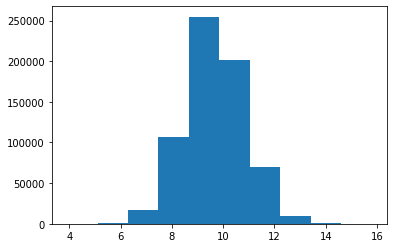

In [90]:
plt.hist(np.log(common_num_melt['value']))
plt.show()

In [91]:
#  columns containing texts of the brands
common_brand = common[['related_same_day_brand', 'related_same_month_brand', 'top_brands']].copy()

In [92]:
common_brand.head()

,related_same_day_brand,related_same_month_brand,top_brands
0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]"
1,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[]
2,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]"
3,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc..."
4,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]"


In [93]:
common_poph = common[['popularity_by_hour']]

In [94]:
# split, format and rename columns 

common['popularity_by_hour'].head()

0    [2617,2457,2403,2519,2646,3007,3886,7566,5508,...
1    [6556,6325,6222,6355,6586,7350,8568,8099,7378,...
2    [807,790,796,786,851,951,1134,1797,1355,1241,1...
3    [2121,1828,1784,1704,1861,2373,3730,7497,7093,...
4    [3804,3716,3686,3672,3735,4115,4855,5946,4526,...
Name: popularity_by_hour, dtype: object

In [95]:
common.columns.str
common1 = pd.concat([common, common['popularity_by_hour'].str.split(',', 24, expand=True)], axis = 1)
common1.head()

,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,...,14,15,16,17,18,19,20,21,22,23
0,010059508001,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...",...,6769,8389,7113,7199,6001,5513,4453,3886,3611,3008]
1,010090506011,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...",...,8431,9784,10263,10830,9527,8885,8591,8240,7489,6930]
2,010479572002,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...",...,1520,1695,1547,1511,1276,1122,1016,1000,924,866]
3,010690404001,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...",...,13176,13719,13754,13973,12287,9946,7051,4825,3330,2539]
4,010730112101,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...",...,4357,5631,6201,6547,5188,4647,4624,4412,4350,3988]


In [96]:
common1.shape

(220331, 37)

In [97]:
common1[0] = common1[0].str.extract('(/d+)')
common1[23] = common1[23].str.extract('(/d+)')
common1.head()

,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,...,14,15,16,17,18,19,20,21,22,23
0,010059508001,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...",...,6769,8389,7113,7199,6001,5513,4453,3886,3611,NaN
1,010090506011,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...",...,8431,9784,10263,10830,9527,8885,8591,8240,7489,NaN
2,010479572002,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...",...,1520,1695,1547,1511,1276,1122,1016,1000,924,NaN
3,010690404001,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...",...,13176,13719,13754,13973,12287,9946,7051,4825,3330,NaN
4,010730112101,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...",...,4357,5631,6201,6547,5188,4647,4624,4412,4350,NaN


In [98]:
common1.rename(columns={0: '12am',1:'1am',2:'2am',3:'3am',4:'4am',5:'5am',6:'6am',7:'7am',8:'8am',9:'9am',10:'10am',11:'11am',12:'12pm',13:'1pm',14:'2pm',15:'3pm',16:'4pm',17:'5pm',18:'6pm',19:'7pm',20:'8pm',21:'9pm',22:'10pm',23:'11pm',24:''})

,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,...,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm
0,010059508001,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...",...,6769,8389,7113,7199,6001,5513,4453,3886,3611,NaN
1,010090506011,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...",...,8431,9784,10263,10830,9527,8885,8591,8240,7489,NaN
2,010479572002,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...",...,1520,1695,1547,1511,1276,1122,1016,1000,924,NaN
3,010690404001,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...",...,13176,13719,13754,13973,12287,9946,7051,4825,3330,NaN
4,010730112101,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...",...,4357,5631,6201,6547,5188,4647,4624,4412,4350,NaN
5,010970063022,152557.0,23556.0,"{""010970063011"":370,""010970063021"":351,""010970...","{""010970063011"":328,""010970064023"":125,""010970...",40327.0,"[""walmart""]","[""walmart"",""Shell Oil"",""Dollar General"",""mcdon...","[""walmart"",""Winn Dixie"",""Ollie's Bargain Outle...","[7153,6710,6479,6556,7460,8527,12533,12134,106...",...,15219,17044,17709,19051,16422,14238,12661,10808,9491,NaN
6,011030057022,66576.0,9252.0,"{""010890028021"":152,""011030057011"":152,""010950...","{""010890111001"":254,""010950305005"":108,""010890...",29100.0,"[""walmart"",""Chick-fil-A""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chick...","[""United States Postal Service (USPS)"",""SUBWAY...","[2261,2191,2140,2130,2202,2818,4315,5583,4157,...",...,5522,6781,7776,7803,6085,4774,4346,3964,3433,NaN
7,011150403002,23534.0,2140.0,"{""011150403001"":114,""011150403003"":110}",{},27052.0,"[""The American Legion"",""Dollar General"",""Jack'...","[""Jack's Family Restaurants"",""walmart"",""Dollar...","[""Dollar General"",""United States Postal Servic...","[2459,2397,2363,2385,2466,2442,2509,3292,2007,...",...,2591,3070,2974,3558,3269,2878,2753,2853,2655,NaN
8,020200014005,20349.0,6101.0,"{""020200027114"":94,""020200028232"":83,""02020002...","{""020200016021"":103,""020200011001"":92,""0202000...",8092.0,"[""Papa Murphy's"",""starbucks"",""Holiday Station""]","[""starbucks"",""walmart"",""mcdonalds"",""Holiday St...","[""Papa Murphy's"",""Burger King US"",""Chevron"",""P...","[673,554,484,439,450,476,583,1313,942,939,1154...",...,2040,1898,2122,2190,1930,1698,1405,1263,1032,NaN
9,040019443002,5102.0,1558.0,{},{},342203.0,"[""Burger King US"",""ConocoPhillips"",""SUBWAY"",""C...","[""walmart"",""Chevron"",""Shell Oil"",""Denny's"",""mc...","[""ConocoPhillips""]","[755,729,701,661,640,686,6

In [99]:
# delete the origninal "popuarity by hour" column
del common1['popularity_by_hour']

In [100]:
common1.shape


(220331, 36)

In [101]:
#check for empty rows
df1 = common1.iloc[:,12:36]
df1.head()


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,NaN,2457,2403,2519,2646,3007,3886,7566,5508,5663,...,6769,8389,7113,7199,6001,5513,4453,3886,3611,NaN
1,NaN,6325,6222,6355,6586,7350,8568,8099,7378,7556,...,8431,9784,10263,10830,9527,8885,8591,8240,7489,NaN
2,NaN,790,796,786,851,951,1134,1797,1355,1241,...,1520,1695,1547,1511,1276,1122,1016,1000,924,NaN
3,NaN,1828,1784,1704,1861,2373,3730,7497,7093,8332,...,13176,13719,13754,13973,12287,9946,7051,4825,3330,NaN
4,NaN,3716,3686,3672,3735,4115,4855,5946,4526,4084,...,4357,5631,6201,6547,5188,4647,4624,4412,4350,NaN


In [102]:
#index where comlumns are empty
df1[df1.isna().all(axis=1)].index

Int64Index([220240, 220241, 220242, 220243, 220244, 220245, 220246, 220247,
            220248, 220249, 220250, 220251, 220252, 220253, 220254, 220255,
            220256, 220257, 220258, 220259, 220260, 220261, 220262, 220263,
            220264, 220265, 220266, 220267, 220268, 220269, 220270, 220271,
            220272, 220273, 220274, 220275, 220276, 220277, 220278, 220279,
            220280, 220281, 220282, 220283, 220284, 220285, 220286, 220287,
            220288, 220289, 220290, 220291, 220292, 220293, 220294, 220295,
            220296, 220297, 220298, 220299, 220300, 220301, 220302, 220303,
            220304, 220305, 220306, 220307, 220308, 220309, 220310, 220311,
            220312, 220313, 220314, 220315, 220316, 220317, 220318, 220319,
            220320, 220321, 220322, 220323, 220324, 220325, 220326, 220327,
            220328, 220329, 220330],
           dtype='int64')

In [103]:
df1[df1.isna().all(axis=1)].shape

(91, 24)

In [104]:
#there are 91 empty rows
common2 = common1.drop(df1[df1.isna().all(axis=1)].index)
common2.shape

(220240, 36)

In [105]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
common2.head()

,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_day,latitude,longitude,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,010059508001,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10...",31.920410,-85.175741,NaN,2457,2403,2519,2646,3007,3886,7566,5508,5663,6004,6861,7411,6781,6769,8389,7113,7199,6001,5513,4453,3886,3611,NaN
1,010090506011,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12...",33.863884,-86.903514,NaN,6325,6222,6355,6586,7350,8568,8099,7378,7556,7185,7404,7842,8300,8431,9784,10263,10830,9527,8885,8591,8240,7489,NaN
2,010479572002,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195...",32.357337,-87.014004,NaN,790,796,786,851,951,1134,1797,1355,1241,1272,1327,1524,1422,1520,1695,1547,1511,1276,1122,1016,1000,924,NaN
3,010690404001,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17...",31.237327,-85.426331,NaN,1828,1784,1704,1861,2373,3730,7497,7093,8332,10246,13083,15648,14525,13176,13719,13754,13973,12287,9946,7051,4825,3330,NaN
4,010730112101,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550...",33.671800,-86.690610,NaN,3716,3686,3672,3735,4115,4855,5946,4526,4084,3923,4214,4290,4357,4357,5631,6201,6547,5188,4647,4624,4412,4350,NaN


In [106]:
# a dataframe with the popularity by day

pop_day = common2['popularity_by_day'].apply(lambda x : dict(eval(x))).apply(pd.Series)
pop_day.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,12000,12224,10626,9923,12116,9516,8717
1,12125,12984,12712,11270,14922,17203,14433
2,2314,2340,2195,1841,2076,1707,1536
3,21141,21143,17546,16578,19793,17794,14174
4,8402,8414,8550,6964,7633,5993,5497


In [107]:
pop_day.shape

(220240, 7)

In [108]:
pop_day[pop_day.isna().all(axis=1)].index

Int64Index([], dtype='int64')

In [109]:
pop_day[pop_day.isna().all(axis=1)].shape

(0, 7)

In [110]:
common2.head()

,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_day,latitude,longitude,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,010059508001,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10...",31.920410,-85.175741,NaN,2457,2403,2519,2646,3007,3886,7566,5508,5663,6004,6861,7411,6781,6769,8389,7113,7199,6001,5513,4453,3886,3611,NaN
1,010090506011,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12...",33.863884,-86.903514,NaN,6325,6222,6355,6586,7350,8568,8099,7378,7556,7185,7404,7842,8300,8431,9784,10263,10830,9527,8885,8591,8240,7489,NaN
2,010479572002,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195...",32.357337,-87.014004,NaN,790,796,786,851,951,1134,1797,1355,1241,1272,1327,1524,1422,1520,1695,1547,1511,1276,1122,1016,1000,924,NaN
3,010690404001,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17...",31.237327,-85.426331,NaN,1828,1784,1704,1861,2373,3730,7497,7093,8332,10246,13083,15648,14525,13176,13719,13754,13973,12287,9946,7051,4825,3330,NaN
4,010730112101,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550...",33.671800,-86.690610,NaN,3716,3686,3672,3735,4115,4855,5946,4526,4084,3923,4214,4290,4357,4357,5631,6201,6547,5188,4647,4624,4412,4350,NaN


In [111]:
data4 = pop_day.loc[:,["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]]
data4['counter'] = range(len(data4))
data4.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,counter
0,12000,12224,10626,9923,12116,9516,8717,0
1,12125,12984,12712,11270,14922,17203,14433,1
2,2314,2340,2195,1841,2076,1707,1536,2
3,21141,21143,17546,16578,19793,17794,14174,3
4,8402,8414,8550,6964,7633,5993,5497,4


In [112]:
data5=pd.melt(data4, id_vars="counter").groupby(["counter"],axis=0).sum()


In [113]:
data5.head()

,value
counter,
0,75122
1,95649
2,14009
3,128169
4,51453


In [114]:
data6 = data4.iloc[:,0:7].div(data5["value"],axis=0)


In [115]:
data6.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0.159740,0.162722,0.141450,0.132092,0.161284,0.126674,0.116038
1,0.126766,0.135746,0.132903,0.117827,0.156008,0.179856,0.150895
2,0.165180,0.167035,0.156685,0.131416,0.148190,0.121850,0.109644
3,0.164946,0.164962,0.136897,0.129345,0.154429,0.138832,0.110588
4,0.163295,0.163528,0.166171,0.135347,0.148349,0.116475,0.106835


In [116]:
#another way to calculate popularity by day
week_list = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]


In [117]:
data4 = pop_day.loc[:, week_list]
# Gets all columns from Monday to Sunday
week_total = data4.sum(axis = 1, skipna = True) 
#Gets the total sum of every element in a row
#That is, the total number of visits per week



In [118]:
#get a week total to then divide every day by it
week_total.shape


(220240,)

In [119]:
data4.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,12000,12224,10626,9923,12116,9516,8717
1,12125,12984,12712,11270,14922,17203,14433
2,2314,2340,2195,1841,2076,1707,1536
3,21141,21143,17546,16578,19793,17794,14174
4,8402,8414,8550,6964,7633,5993,5497


In [120]:
#To find the ratio of visits in a day, divide the visits in a day with the total of visits in that week (Which is in week total)
data4 = data4.loc[:,week_list].div(week_total, axis = 0)

In [121]:
#change column names to append without problem to main dataset
data4.rename(columns={"Monday": "Monday(ratio)", "Tuesday": "Tuesday(ratio)", "Wednesday": "Wednesday(ratio)", "Thursday": "Thursday(ratio)", "Friday": "Friday(ratio)", "Saturday": "Saturday(ratio)", "Sunday": "Sunday(ratio)"}, inplace=True)


In [122]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220240 entries, 0 to 220239
Data columns (total 7 columns):
Monday(ratio)       220240 non-null float64
Tuesday(ratio)      220240 non-null float64
Wednesday(ratio)    220240 non-null float64
Thursday(ratio)     220240 non-null float64
Friday(ratio)       220240 non-null float64
Saturday(ratio)     220240 non-null float64
Sunday(ratio)       220240 non-null float64
dtypes: float64(7)
memory usage: 13.4 MB


In [136]:

hour_list = ['12am','1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']

data7 = common2.loc[:,hour_list]

KeyError: "None of [Index(['12am', '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am',\n       '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm',\n       '8pm', '9pm', '10pm', '11pm'],\n      dtype='object')] are in the [columns]"

In [126]:
data7.head()

NameError: name 'data7' is not defined